In [276]:
import pandas as pd
import numpy as np
import warnings
from datetime import date, timedelta, datetime
import time
import requests 
import itertools
import json
from io import StringIO
from pathlib import Path 
from pandas import json_normalize
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [111]:
df_airbnb = pd.read_csv('C:\\Users\\luism\\Downloads\\airbnb-listings.csv',sep=';',error_bad_lines=False)
df_airbnb.head(1)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,14712301,https://www.airbnb.com/rooms/14712301,20170304065726,2017-03-04,Cozy Studio between Earls Court and Gloucester Rd,Located 1 minute away from Earls Court. It is ...,NaN,Located 1 minute away from Earls Court. It is ...,none,NaN,...,9.0,9.0,10.0,NaN,NaN,strict,1.0,0.3,"51.4924740202,-0.188628400994","Host Has Profile Pic,Host Identity Verified"


In [112]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
df_airbnb.describe(include='number')

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,14780.0,14780.0,14780.0,12881.0,14777.0,14777.0,14780.0,14780.0,14780.0,14725.0,...,14780.0,11476.0,11454.0,11460.0,11443.0,11460.0,11440.0,11439.0,14776.0,11618.0
mean,10280894.8,20170373091032.5,36080798.2,94.8,12.5,12.5,40.5,-3.9,3.3,1.3,...,22.6,91.7,9.4,9.3,9.6,9.6,9.5,9.2,9.5,1.9
std,5564828.9,566797091.4,34253595.3,15.2,34.1,34.1,4.6,14.1,2.1,0.7,...,38.3,9.0,0.9,1.0,0.8,0.8,0.8,1.0,23.6,1.9
min,18628.0,20160104002432.0,17453.0,0.0,0.0,0.0,-37.9,-123.1,1.0,0.0,...,0.0,20.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0
25%,5554731.5,20170407214119.0,6787360.2,100.0,1.0,1.0,40.4,-3.7,2.0,1.0,...,1.0,89.0,9.0,9.0,9.0,9.0,9.0,9.0,1.0,0.5
50%,11334923.0,20170407214119.0,24648753.5,100.0,2.0,2.0,40.4,-3.7,3.0,1.0,...,7.0,94.0,10.0,10.0,10.0,10.0,10.0,9.0,2.0,1.2
75%,15326313.5,20170407214119.0,54329188.2,100.0,6.0,6.0,40.4,-3.7,4.0,1.0,...,27.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,2.8
max,19109692.0,20170615002708.0,124753355.0,100.0,519.0,519.0,56.0,153.4,16.0,8.0,...,446.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,145.0,17.2


In [113]:
df_airbnb.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [114]:
df_airbnb.shape

(14780, 89)

In [115]:
print('Valores Nulos')
df_airbnb.isnull().sum().reset_index().sort_values(0,ascending=False).head(40)

Valores Nulos


,index,0
66,Has Availability,14768
27,Host Acceptance Rate,14741
83,Jurisdiction Names,14553
82,License,14431
55,Square Feet,14182
58,Monthly Price,11219
57,Weekly Price,11190
10,Notes,9136
59,Security Deposit,8524
13,Interaction,6552


In [116]:
## remove missing values columns 
df_airbnb = df_airbnb.drop(columns=['Has Availability','Host Acceptance Rate','Jurisdiction Names','License','Square Feet','Monthly Price','Weekly Price','Notes','Security Deposit','Interaction'])

In [117]:
text_columns = ['Summary','Space','Description','Neighborhood Overview','Transit','Access','House Rules','Thumbnail Url','Medium Url','Picture Url','XL Picture Url','Host About','Host Thumbnail Url','Host Picture Url']
for columns in text_columns:
    new_column_name = 'dummy_'+columns
    df_airbnb[new_column_name] = df_airbnb[columns].apply(lambda x: 0 if pd.isnull(x) else 1)
    df_airbnb.drop(columns=columns,inplace=True)

In [118]:
cat_columns = ['Host Response Time','Market','Room Type','Property Type']
for columns in cat_columns:
    df_airbnb= pd.get_dummies(df_airbnb, columns=[columns], prefix=columns, prefix_sep='_',drop_first=True)
    

In [119]:
df_airbnb['count_Host Verifications'] = df_airbnb['Host Verifications'].str.split(',').str.len()

In [121]:
newdf = df_airbnb.select_dtypes(include=np.number)
newdf.nunique().reset_index().sort_values(0,ascending=False).head(5)

,index,0
0,ID,14780
6,Latitude,14780
7,Longitude,14780
2,Host ID,8935
31,Reviews per Month,841


In [122]:
newdf.drop(columns=['ID','Latitude','Longitude','Host ID','Scrape ID'],inplace=True)

C:\Users\luism\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [138]:
df_airbnb_cleaned = newdf.copy()

<AxesSubplot:>

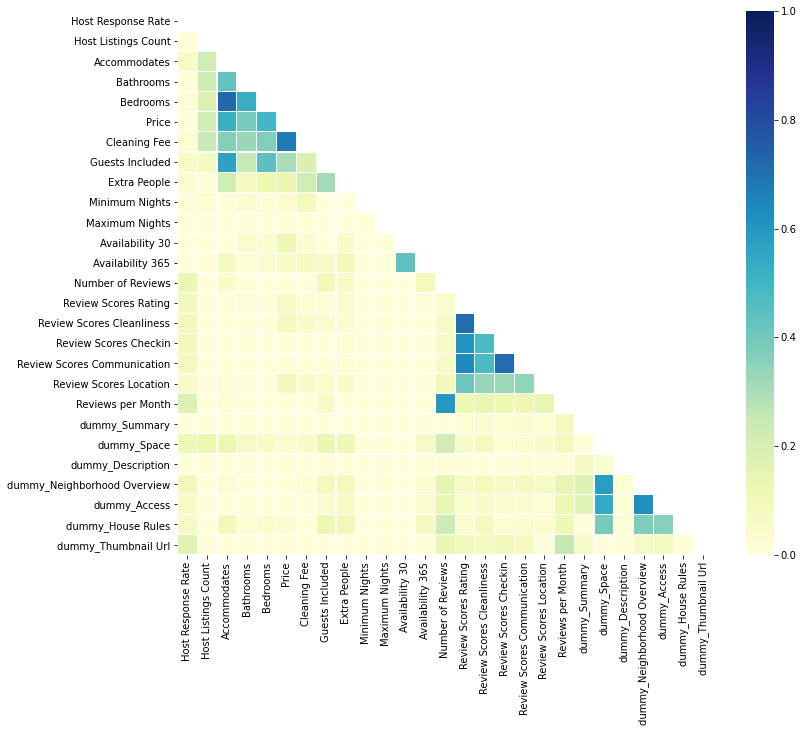

In [290]:

corr_matrix = df_airbnb_cleaned.iloc[:,:27].corr()
mask = np.zeros_like(corr_matrix,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f , ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix,mask=mask,vmin=0,vmax=1,linewidths=.1,center=0.5,cmap="YlGnBu",cbar_kws={"shrink":1})


In [163]:
def remove_correlated_columns(threshold):
    col_corr = set() 
    corr_matrix = df_airbnb_cleaned.iloc[:,:27].corr()
    dataset = df_airbnb_cleaned.copy()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] 
                col_corr.add(colname)
                if colname in df_airbnb_cleaned.columns:
                    del df_airbnb_cleaned[colname] 

    return dataset
df_airbnb_cleaned_corr = remove_correlated_columns(0.75)
df_airbnb_cleaned_corr

,Host Response Rate,Host Listings Count,Accommodates,Bathrooms,Bedrooms,Price,Cleaning Fee,Guests Included,Extra People,Minimum Nights,...,Property Type_Hostel,Property Type_House,Property Type_Loft,Property Type_Other,Property Type_Serviced apartment,Property Type_Tent,Property Type_Timeshare,Property Type_Townhouse,Property Type_Villa,count_Host Verifications
0,100.0,1.0,1,1.0,1.0,50.0,30.0,1,20,5,...,0,0,0,0,0,0,0,0,0,5.0
1,nan,2.0,8,2.5,5.0,175.0,100.0,6,25,1,...,0,1,0,0,0,0,0,0,0,3.0
2,90.0,10.0,2,1.0,1.0,155.0,nan,1,0,1,...,0,0,0,0,0,0,0,0,0,4.0
3,100.0,1.0,2,1.0,1.0,36.0,nan,1,0,2,...,0,0,0,0,0,0,0,0,0,4.0
4,94.0,3.0,2,1.0,1.0,85.0,30.0,1,0,3,...,0,0,0,0,0,0,0,0,0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14775,99.0,207.0,6,1.0,6.0,94.0,nan,1,0,2,...,0,0,0,0,0,0,0,0,0,4.0
14776,100.0,1.0,4,1.0,1.0,90.0,30.0,2,20,2,...,0,0,0,0,0,0,0,0,0,4.0
14777,99.0,207.0,4,1.0,1.0,93.0,nan,1,0,2,...,0,0,0,0,0,0,0,0,0,4.0
14778,98.0,14.0,5,1.0,3.0,120.0,35.0,2,20,3,...,0,0,0,0,0,0,0,0,0,5.0


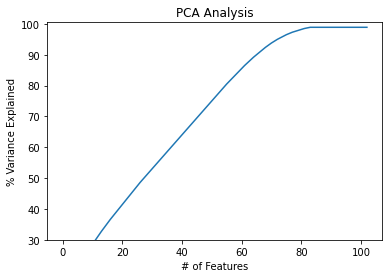

In [194]:
loan = df_airbnb_cleaned_corr.dropna(axis =0, how = 'any')
x = loan.values 
x = scale(x);x
covar_matrix = PCA(n_components = len(df_airbnb_cleaned_corr.columns))
covar_matrix.fit(x)
variance = covar_matrix.explained_variance_ratio_ 

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')

plt.plot(var)

In [223]:

X1=loan.drop(columns=['Price'])
X= sm.add_constant(X1)
y=loan['Price']

est=sm.OLS(endog=y,exog=X)
est2 = est.fit()

beta0 = round(est2.params[0],5)
est2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     191.2
Date:                Sun, 09 May 2021   Prob (F-statistic):               0.00
Time:                        15:22:02   Log-Likelihood:                -33800.
No. Observations:                6859   AIC:                         6.777e+04
Df Residuals:                    6773   BIC:                         6.836e+04
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Host Response Rate                        0.0334      0.064      0.520      0.603      -0.092       0.159
Host Listings Count                       0.0367      0.017      2.181      0.029       0.004       0.070
Accommodates                              3.8613      0.386     10.012      0.000       3.105       4.617
Bathrooms                                24.4982      0.951     25.754      0.000      22.633      26.363
Bedrooms                                  8.7128      0.745     11.688      0.000       7.252      10.174
Cleaning Fee                              0.7893      0.024     33.563      0.000       0.743       0.835
Guests Included                           2.7166      0.420      6.464      0.000       1.893       3.540
Extra People                             -0.1827      0.040     -4.605      0.000      -0.260      -0.105
Minimum Nights                           -0.4605      0.098     -4.690      0.000      -0.653      -0.268
Maximum Nights                         4.811e-06   3.32e-05      0.145      0.885   -6.02e-05    6.98e-05
Availability 30                           0.4487      0.064      6.995      0.000       0.323       0.574
Availability 365                          0.0090      0.004      2.338      0.019       0.001       0.017
Number of Reviews                        -0.0054      0.013     -0.414      0.679      -0.031       0.020
Review Scores Rating                      0.5084      0.083      6.094      0.000       0.345       0.672
Review Scores Cleanliness                 1.6233      0.638      2.545      0.011       0.373       2.874
Review Scores Checkin                    -2.0501      0.819     -2.503      0.012      -3.656      -0.444
Review Scores Communication              -1.3117      0.909     -1.442      0.149      -3.095       0.471
Review Scores Location                    4.9259      0.661      7.451      0.000       3.630       6.222
Reviews per Month                        -1.0862      0.316     -3.440      0.001      -1.705      -0.467
dummy_Summary                             4.9301      2.331      2.115      0.034       0.360       9.500
dummy_Space                               4.9834      1.432      3.480      0.001       2.176       7.791
dummy_Description                         9.3431     23.937      0.390      0.696     -37.580      56.266
dummy_Neighborhood Overview              -0.0486      1.511     -0.032      0.974      -3.010       2.913
dummy_Transit                            -4.2257      1.491     -2.834      0.005      -7.149      -1.302
dummy_Access                              1.0555      1.114      0.947      0.343      -1.128       3.239
dummy_House Rules                         0.0996      1.055      0.094      0.925      -1.969       2.168
dummy_Thu

In [265]:


X1=loan.drop(columns=['Price']).values
X= sm.add_constant(X1)
y=loan['Price'].values
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size= 0.25)
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

MSE:  34.543122128032756
R2:  0.6910394665186573


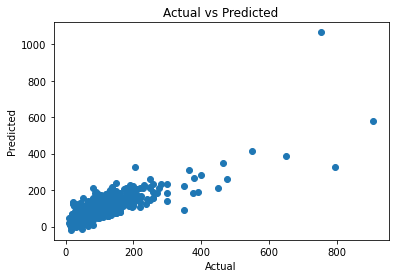

In [268]:
import math
print('MSE: ',math.sqrt(mean_squared_error(y_test,y_pred)))
print('R2: ',r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted');